In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import numpy as np
import pandas as pd
import datetime as dt
# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy as db
from sqlalchemy import MetaData, Table, select
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
Base = automap_base()
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

In [5]:
# Tables available to reference: 
Base.classes.keys()

['measurement', 'station']

In [6]:
# Create a metadata instance
metadata = MetaData(engine)

In [7]:
# reflect the tables
mtable = Table('measurement', metadata, autoload=True, autoload_with=engine)
repr(mtable)

"Table('measurement', MetaData(bind=Engine(sqlite:///Resources/hawaii.sqlite)), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)"

In [8]:
stable = Table('station', metadata, autoload=True, autoload_with=engine)
repr(stable)

"Table('station', MetaData(bind=Engine(sqlite:///Resources/hawaii.sqlite)), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)"

In [9]:
# reflect db schema to MetaData
metadata.reflect(bind=engine)

In [10]:
# Create all tables
metadata.create_all()
for _t in metadata.tables:
   print("Table: ", _t)

Table:  measurement
Table:  station


In [17]:
# We can view all of the classes that automap found and compare multiple tables for similarities.
s = select([mtable,stable]) #.join(['station'])
results = engine.execute(s).fetchall()
results

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (1, 'USC00519397', '2010-01-01', 0.08, 65.0, 2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (1, 'USC00519397', '2010-01-01', 0.08, 65.0, 3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (1, 'USC00519397', '2010-01-01', 0.08, 65.0, 4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (1, 'USC00519397', '2010-01-01', 0.08, 65.0, 5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (1, 'USC00519397', '2010-01-01', 0.08, 65.0, 6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (1, 'USC00519397', '2010-01-01', 0.08, 65.0, 7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (1, 'USC00519397', '2010-01-01', 0.08, 65.0, 8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (1, 'USC00519397', '2

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Reference Column names in a cleaner format: 
connection = engine.connect()
# Result Proxy: 
rp = connection.execute(s)
# List of column names: 
rp.keys()

['id',
 'station',
 'date',
 'prcp',
 'tobs',
 'id',
 'station',
 'name',
 'latitude',
 'longitude',
 'elevation']

In [12]:
# Save references to each table
m = Base.classes['measurement']
st = Base.classes['station']


In [23]:
# Join Columns at station from tables 
columns = [m.id, m.station, m.date, m.prcp, m.tobs, st.id, st.station, st.name, st.latitude, st.longitude, st.elevation]

results = session.query(*columns).filter(m.station == st.station).all()

# # climate = select(columns)
# climate.filter.station == st.station
# engine.execute(climate).fetchall()
# #  = climate.select_from(m.join(m.station).join(st.st.station)).where(m.station == st.station)

In [24]:
df= pd.DataFrame(results)
df.head()

,id,station,date,prcp,tobs,id,station,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


# Exploratory Climate Analysis

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results:
# Calculate the date 1 year ago from the last data point in the database
session.query(m.date).order_by(m.date.desc()).first()

('2017-08-23')

In [26]:
# Calculate Date
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date :", query_date)

Query Date : 2016-08-23


In [27]:
# The last 12 months:
session.query(m.date).\
    filter((m.date < '2017-08-23') & (m.date > '2016-08-23') ).\
    order_by(m.date).limit(12).all()

[('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25')]

In [28]:
# Creates queries and then appends to list: 
prcp_list = []
def query_data(table, query, listed):
    # Perform a query to retrieve the data and precipitation scores
    data = session.query(table.date, table.prcp).filter(table.date >= query).all()
    for record in data:
        listed.append(record) 
    return listed

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(query_data(m, query_date, prcp_list), columns = ["Date", "Prcp"])
prcp_df.set_index("Date", inplace=True)
prcp_df = prcp_df.dropna()
prcp_df

,Prcp
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-17,0.13
2017-08-19,0.09
2017-08-21,0.56


In [29]:
# Use Pandas to calcualte the summary statistics for the precipitation data
p_stat = prcp_df["Prcp"].describe()
pstat_df = pd.DataFrame(p_stat)
pstat_df.rename(columns = {"Prcp": "Precipitation"})

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [30]:
# fig, ax = plt.subplots()
# ax.xaxis_date()
# # Define the date format
# ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))
# ax.xaxis.set_minor_locator(mdates.DayLocator())
# ax.bar(prcp_df.index, prcp_df['Prcp'], figsize=(20,15), width=25, align='center')

####Creates a runtime error, Locator attempting to generate 3654 ticks from 730120.0 to 733773.0: exceeds Locator.MAXTICKS ........

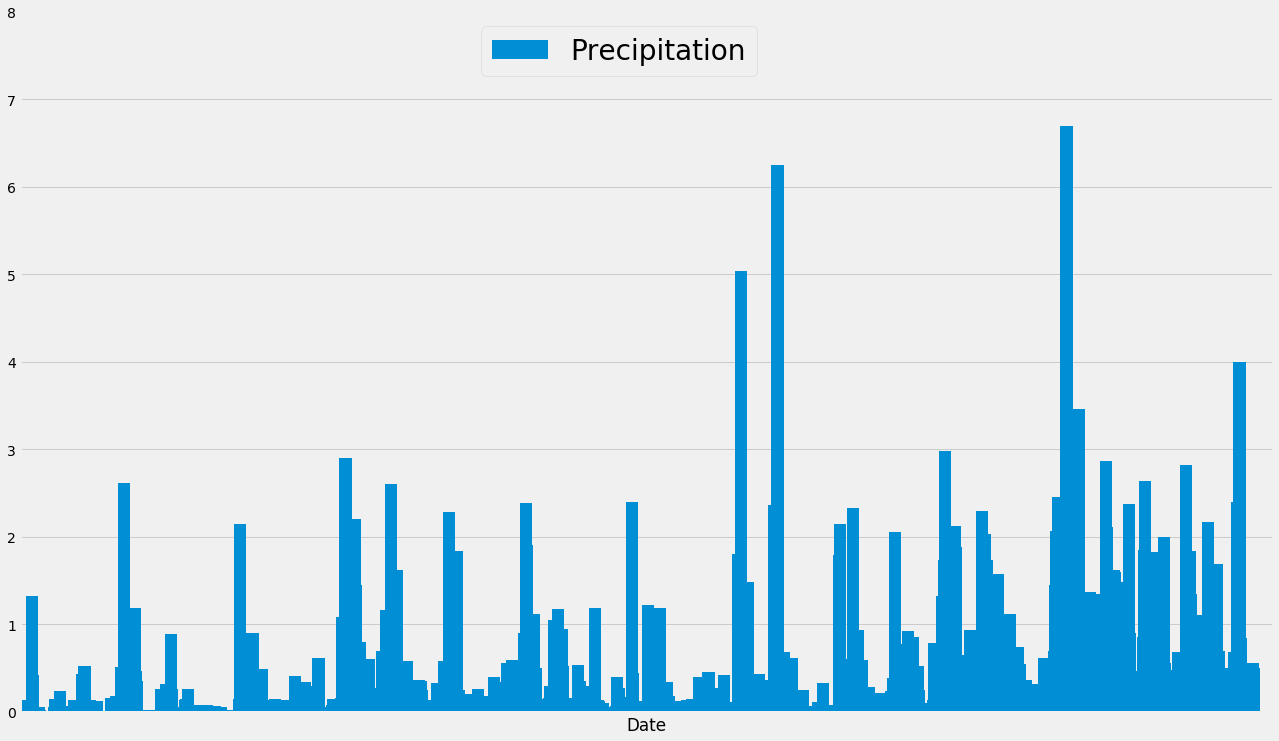

In [127]:
# stick= dt.date(2017, 8, 23) 
# etick= dt.date(2016, 8, 23)
# step =  dt.timedelta(15)

# Use Pandas Plotting with Matplotlib to plot the data
ax = prcp_df.plot.bar(figsize=(20,12), width=20)
plt.ylim(0,8)
plt.xlim(0,2050)
plt.tick_params(axis='x', bottom=False, top=False, labelbottom= True, labelrotation = 270)
ticks = np.arange(1,2020, 165)
plt.xticks(ticks)
# ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(1))
plt.legend(['Precipitation'], fontsize=28)
ax.get_legend().set_bbox_to_anchor((0.6, 1))

plt.show()


In [111]:
# Design a query to show how many stations are available in this dataset?
session.query(st).group_by(st.station).count()

9

In [112]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(m.station, func.count(m.date)).group_by(m.station).\
    order_by(func.count(m.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [113]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
def active_station(table):
    active = session.query(table.station, func.count(table.date)).group_by(table.station).\
        order_by(func.count(table.date).desc()).first()
    query = session.query(table.station, func.min(table.tobs), func.max(table.tobs), func.avg(table.tobs)).\
        filter(table.station == active[0]).all()
    print(query)
active_station(m)

[('USC00519281', 54.0, 85.0, 71.66378066378067)]


In [114]:
# Choose the station with the highest number of temperature observations.
active = session.query(m.station, func.count(m.date)).group_by(m.station).\
        order_by(func.count(m.date).desc()).first()
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
t_query=session.query(m.tobs).filter(m.station== active[0]).\
    filter(m.date>=query_date).all()
t_query

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [115]:
# Creating dataframe from query: 
temp_list = []
def query_tdata(table, query, listed):
    # Perform a query to retrieve the data and precipitation scores
    data = query
    for record in data:
        listed.append(record) 
    return listed
# Save the query results as a Pandas DataFrame and set the index to the date column
tobs_df = pd.DataFrame(query_tdata(m, t_query, temp_list), columns = ["TOBS"])
tobs_df = tobs_df.dropna()
tobs_df

,TOBS
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


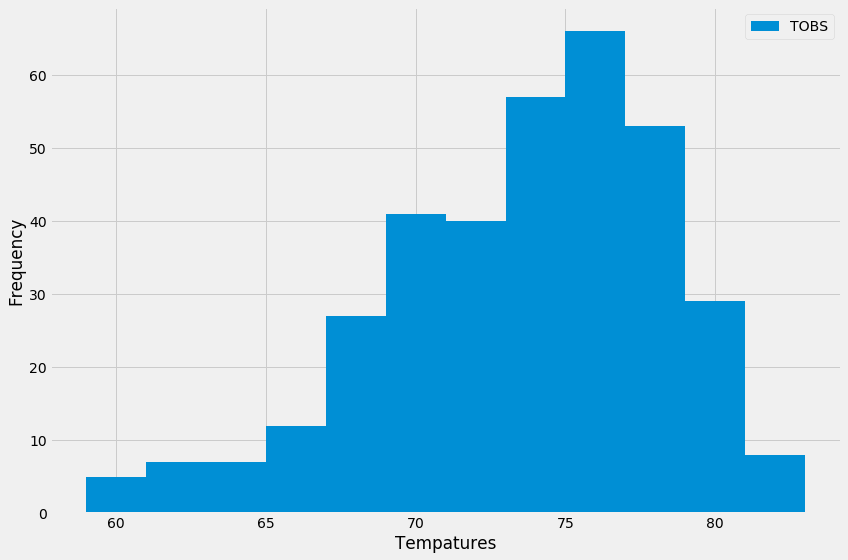

<Figure size 432x288 with 0 Axes>

In [116]:
# Plot the results as a histogram with `bins=12`:
# create the plot
plt.figure(figsize=(12,8))
plt.hist(tobs_df["TOBS"], bins=12)
plt.xlabel("Tempatures")
plt.ylabel("Frequency")
plt.legend(["TOBS"])
plt.tight_layout()
plt.show()

plt.savefig("Images/tobs_frequecy.png")
plt.show()

## Bonus Challenge Assignment

In [117]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(m.tobs), func.avg(m.tobs), func.max(m.tobs)).\
        filter(m.date >= start_date).filter(m.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [118]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2011-02-28', '2011-03-05'))

[(61.0, 69.75510204081633, 75.0)]


In [119]:
def gradient_image(ax, extent, direction=0.3, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    extent
        The extent of the image as (xmin, xmax, ymin, ymax).
        By default, this is in Axes coordinates but may be
        changed using the *transform* kwarg.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular useful is *cmap*.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, extent=extent, interpolation='bicubic',
                   vmin=0, vmax=1, **kwargs)
    return im

In [120]:
# To generate a gradient bar that matches with tempature change: 
def gradient_bar(ax, x, y, width=0.5, bottom=0):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=plt.cm.Reds, cmap_range=(0, 0.8))

   T_min      T_avg  T_max
0   61.0  69.755102   75.0


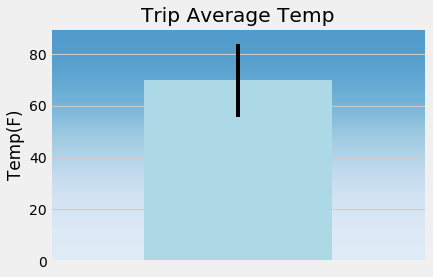

In [121]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# Use queries and load to dataframe and create plot: 
def load_data(query, df):

    # create the dataframe
    df = pd.DataFrame(query, columns=["T_min", "T_avg", "T_max"])
    print (df)
    
    # plot the average temp 
    xmin, xmax = xlim = 0, 10
    ymin, ymax = ylim = 0, 90

    fig, ax = plt.subplots()
    ax.set(xlim=xlim, ylim=ylim, autoscale_on=False)

    # background image
    gradient_image(ax, direction=0, extent=(0, 1, 0, 1), transform=ax.transAxes,
               cmap=plt.cm.Blues, cmap_range=(0.1, 0.6))
    # The bar has to be ploted from ax, can't figure out why gradient is not working
    ax=df["T_avg"].plot.bar(yerr=(df["T_max"]-df["T_min"]), color="lightblue")
    x = df["T_avg"]
    y = yerr=(df["T_max"]-df["T_min"])
    gradient_bar(ax, x, y, width= .1)
    ax.set_aspect('auto')
    plt.title("Trip Average Temp")
    plt.ylabel("Temp(F)")
    ax.axes.get_xaxis().set_visible(False)
    plt.savefig("Images/trip_temp.png")
    return plt.show()
load_data(calc_temps('2011-02-28', '2011-03-05'), 'tremp_df')

In [122]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall_list = [] 
def rain_data(table1, table2, start_d, end_d):
    col = [func.count(table1.prcp),table1.station, table2.name, table2.latitude, table2.longitude, table2.elevation]
    rainfall = session.query(*col).filter(table1.station==table2.station).\
        group_by(table1.station).\
        filter(table1.date >= start_d).filter(table1.date <= end_d).\
        order_by(func.count(table1.prcp).desc()).all()
    for r in rainfall:
        print(r)
        rainfall_list.append(r)
    return 
rain_data(m, st, '2011-02-28', '2011-03-05')

(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(6, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(6, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(6, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)
(6, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(5, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(5, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(4, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(0, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)


In [123]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(m.tobs), func.avg(m.tobs), func.max(m.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", m.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [124]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals_list = [] 
trip_days = [] 

# Set the start and end date of the trip:
start = dt.datetime.strptime('2011-02-28', '%Y-%m-%d')

# add extra day to make sure the end day you want is included
end = dt.datetime.strptime('2011-03-06', '%Y-%m-%d')

# generate days from start to end and generate dates in between:
date_generated = [start + dt.timedelta(days=x) for x in range(0, (end-start).days)]

# Created a loop to generate list of dates: 
[trip_days.append(date.strftime("%m-%d")) for date in date_generated]

# append data from dates and extract normals
[normals_list.append(daily_normals(data)) for data in trip_days]

# grab the sub list
normals = [item for sublist in normals_list for item in sublist]



# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, columns=["Tmin","Tavg","Tmax"], index= trip_days)
normals_df.index.name="Dates"
normals_df

,Tmin,Tavg,Tmax
Dates,,,
02-28,65.0,70.655172,80.0
03-01,64.0,70.032787,76.0
03-02,61.0,70.366667,78.0
03-03,60.0,70.068966,78.0
03-04,57.0,69.272727,77.0
03-05,60.0,67.890909,76.0


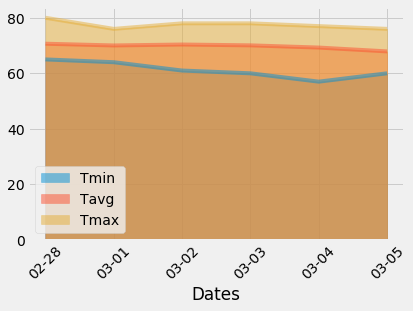

In [125]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot.area(stacked=False)
plt.xticks(rotation=45)
plt.show()

